# MNIST Digit Recognizer - TensorFlow

### Aim of the Assignment
The task is to create a digit recognizer, calculate its accuracy metrix, and create predictions with the model.

### About the Dataset
Source: [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data) \
The data contains 60,000 gray-scale images of hand-drawn digits, from zero through nine. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Dataset comes with a test set of 10,000 images.

## 1. Load and verify the data

In [1]:
#Import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#load the data and divide it to train and test set
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [2]:
#check the shape of the train and test data
print('Train_data: tensor of shape',train_images.shape,'dimension',train_images.ndim)
print('Train_labels: tensor of shape',train_labels.shape,'dimension',train_labels.ndim)
print('Test_data: tensor of shape',test_images.shape,'dimension',test_images.ndim)
print('Test_labels: tensor of shape',test_labels.shape,'dimension',test_labels.ndim)

Train_data: tensor of shape (60000, 28, 28) dimension 3
Train_labels: tensor of shape (60000,) dimension 1
Test_data: tensor of shape (10000, 28, 28) dimension 3
Test_labels: tensor of shape (10000,) dimension 1


In [3]:
#check the value distribution
labels = train_labels.tolist()
labels_dic = dict((i, labels.count(i)) for i in labels)
labels_dic

{5: 5421,
 0: 5923,
 4: 5842,
 1: 6742,
 9: 5949,
 2: 5958,
 3: 6131,
 6: 5918,
 7: 6265,
 8: 5851}

<Axes: >

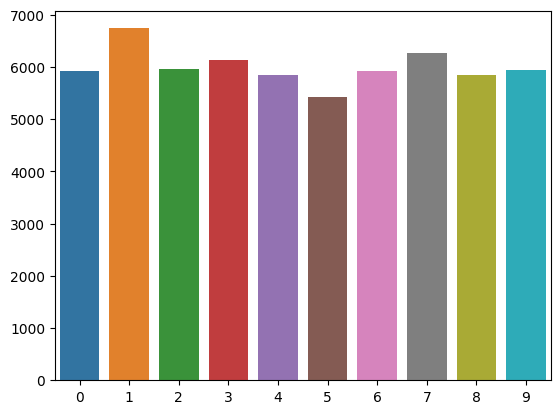

In [4]:
sns.barplot(x=list(labels_dic.keys()),y=list(labels_dic.values()))

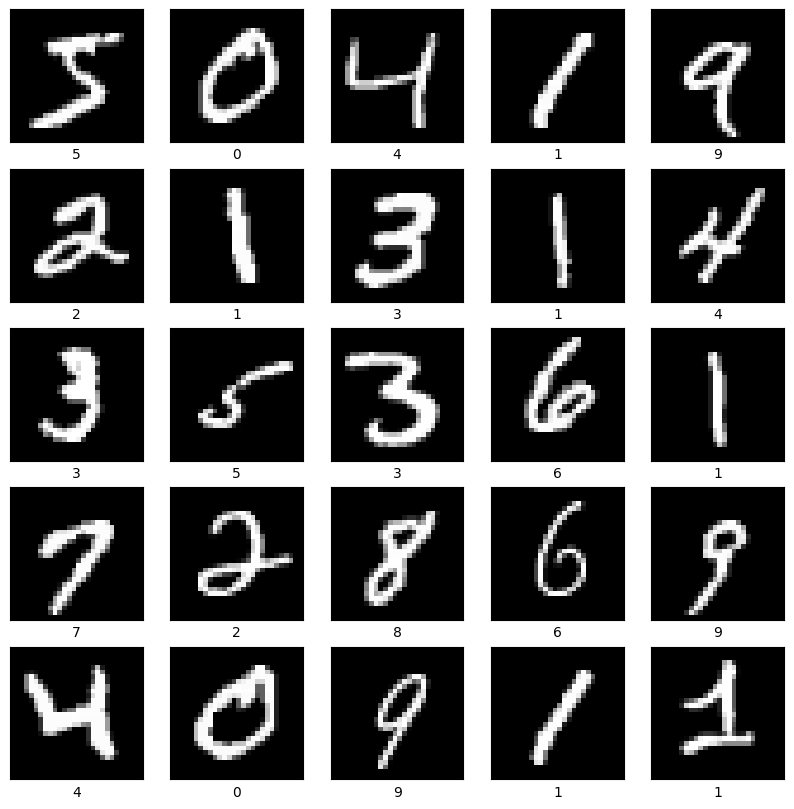

In [5]:
#check a sample of photos
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

### 2. Transform the Data

In [6]:
#normalize the data
train_data = train_images.reshape((60000, 28, 28, 1))
train_data = train_data.astype('float32')
train_data /= 255

test_data = test_images.reshape((10000, 28, 28, 1))
test_data = test_data.astype('float32')
test_data /= 255

### 3. Create the Convolutional Base

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [9]:
#add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs = 3, batch_size = 128, validation_split=0.2)

Epoch 1/3
375/375 [==============================] - 15s 39ms/step - loss: 0.2801 - accuracy: 0.9166 - val_loss: 0.0765 - val_accuracy: 0.9786
Epoch 2/3
375/375 [==============================] - 14s 38ms/step - loss: 0.0681 - accuracy: 0.9783 - val_loss: 0.0552 - val_accuracy: 0.9820
Epoch 3/3
375/375 [==============================] - 15s 39ms/step - loss: 0.0474 - accuracy: 0.9849 - val_loss: 0.0451 - val_accuracy: 0.9862


In [12]:
history_dict = model.history

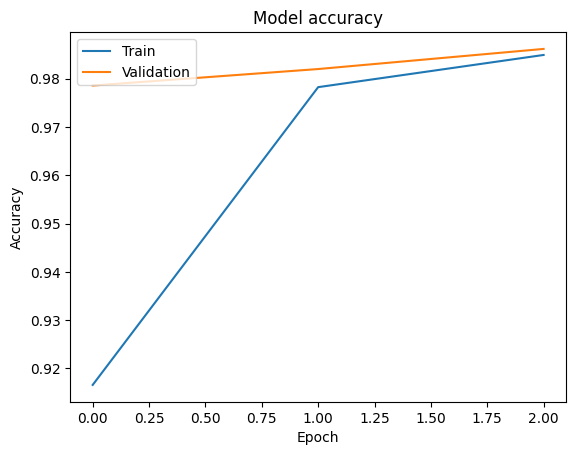

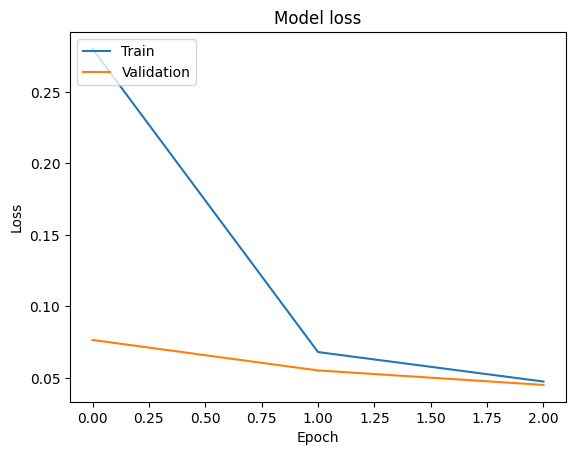

In [13]:
#plot training history
def plot_history(history_dict):
    #plot training and validation accuracy values
    plt.plot(history_dict.history['accuracy'])
    plt.plot(history_dict.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    #plot training and validation loss values
    plt.plot(history_dict.history['loss'])
    plt.plot(history_dict.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

#call the function to plot the history
plot_history(history_dict)

In [14]:
#calculate the accuracy with the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 4.9846 - accuracy: 0.9881
Test accuracy: 0.988099992275238


### 4. Create Predictions

In [15]:
import numpy as np

predictions = model.predict(test_data)

sample_number = 5000
print(predictions[sample_number])
print('Prediction =',np.argmax(predictions[sample_number]))
print('True =',test_labels[sample_number])


313/313 [==============================] - 1s 4ms/step
[-6.3714514 -3.9517474  1.5769522 15.072831  -4.265262   0.9609998
 -6.57913   -3.565432   3.0074003 -1.5532817]
Prediction = 3
True = 3


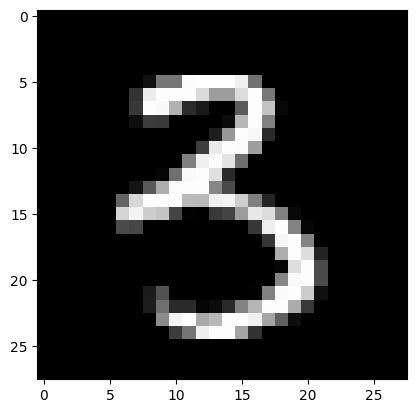

In [16]:
image = test_images[sample_number]
plt.imshow(image, cmap='gray')
plt.show()